<a href="https://colab.research.google.com/github/Nokulunga77/Bank-Segmentation-/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Banking Customer Segmentation 

#### by Nokulunga Twala

## Table of contents
1. [Introduction](#intro)
2. [Load Dependencies](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
8. [Conclusion](#conclusion)
9. [References](#references)

<a id="intro"></a>
## 1. **Introduction**

<a id="intro"></a>
## 2. **Load Dependencies**

### Libraries 

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

import requests
import io

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# Data Preprocessing
import random
from time import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# for operating system
import os


#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Case Study/bank_transactions.csv')

<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization.

In [4]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
(df.isnull().sum()/len(df))*100

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [11]:
df['CustGender'].value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64

In [18]:
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

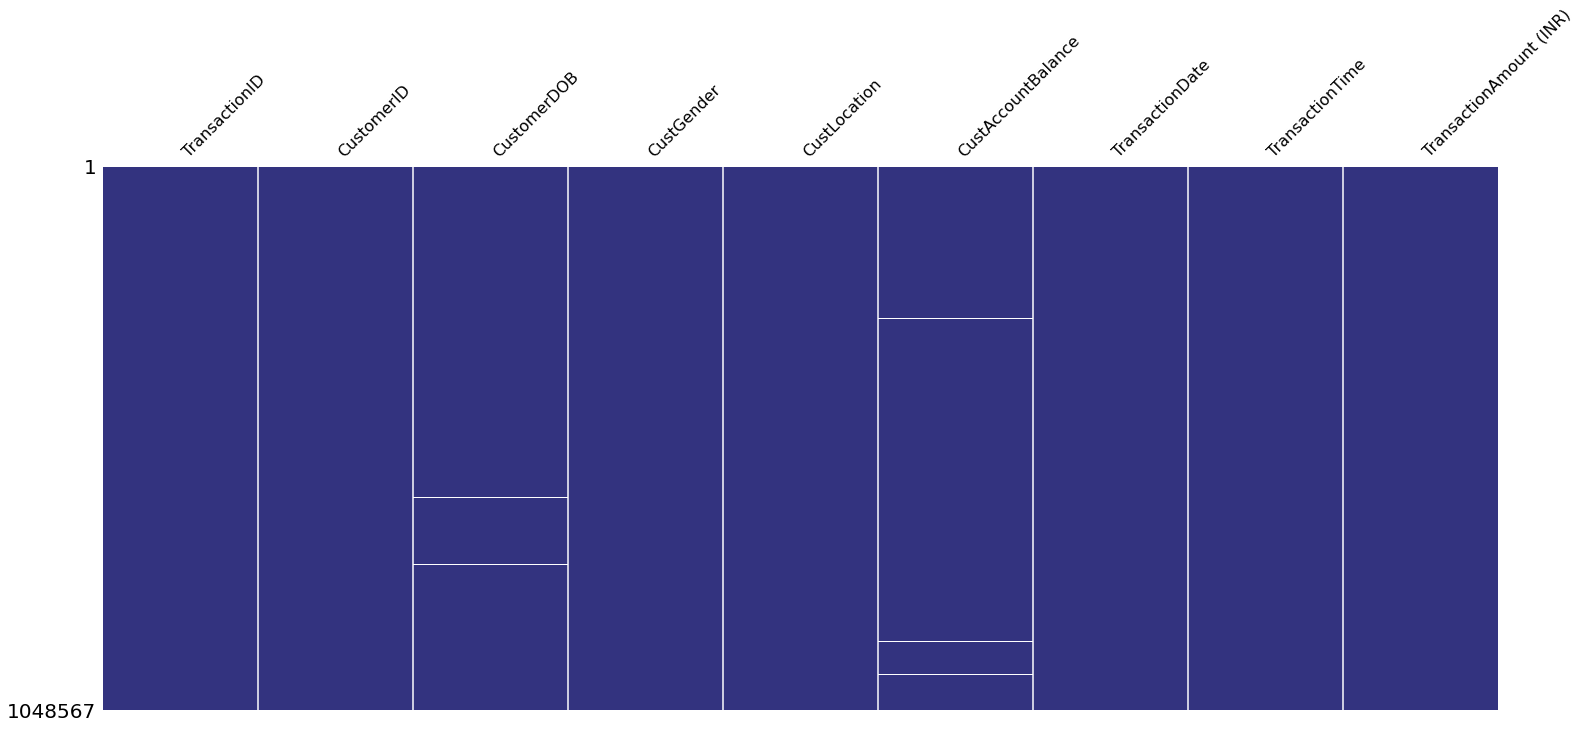

In [7]:
import missingno as msno
msno.matrix(df,sparkline = False,color = (0.2, 0.2, 0.5))

In [8]:
#To remove the nullvalues
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 1041614


<a id="intro"></a>
## 4. Exploratory Data Analysis

The EDA data analysis is used to get a better understanding of data and look for the data. For statisticians, it is similar to a kind of storytelling. It allows for the discovery of trends and observations within data using visual methods. Aside from that, EDA is frequently used as the first step in the data modeling process. It will explore the dataset as well as perform the exploratory data analysis.

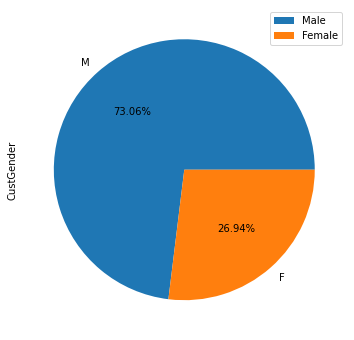

In [19]:
df.CustGender.value_counts().plot(kind = "pie", figsize = (9,6), autopct='%1.2f%%')
plt.legend(['Male', 'Female']);

<a id="features"></a>
## 5. **Feature engineering And Selection**

In [12]:
df.CustomerDOB = pd.datetime(df.CustomerDOB, errors='coerce')

TypeError: ignored

In [30]:
#Age of customer today 
from datetime import date
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [31]:
df['Age'] = df.CustomerDOB.apply(age)

AttributeError: ignored

In [14]:
#Transaction Date
df.TransactionDate = pd.to_datetime(df.TransactionDate,errors='coerce')

In [15]:
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [16]:
df.drop('TransactionDate',axis=1,inplace=True)